## Agrupamentos nos dados sobre a COVID-19 nos municípios paraibanos.
* Explorando como os municípios do Estado se agrupam quanto as variáveis casos confirmados por 100 mil habitantes e mortalidade (razão entre o número absoluto de mortes e o número absoluto de casos confirmados).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import norm

In [2]:
casos_df = pd.read_csv("datasets/dados_casos.csv")
casos_df.head(5)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-08-22,PB,Água Branca,city,1128,14,True,10306,2500106,10945.08054,0.0124
1,2021-08-22,PB,Aguiar,city,528,5,True,5630,2500205,9378.33037,0.0095
2,2021-08-22,PB,Alagoa Grande,city,4117,72,True,28439,2500304,14476.59904,0.0175
3,2021-08-22,PB,Alagoa Nova,city,1511,25,True,20921,2500403,7222.40811,0.0165
4,2021-08-22,PB,Alagoinha,city,2072,25,True,14560,2500502,14230.76923,0.0121


Primeiramente, plotamos o gráfico scatter para as variáveis analisadas.

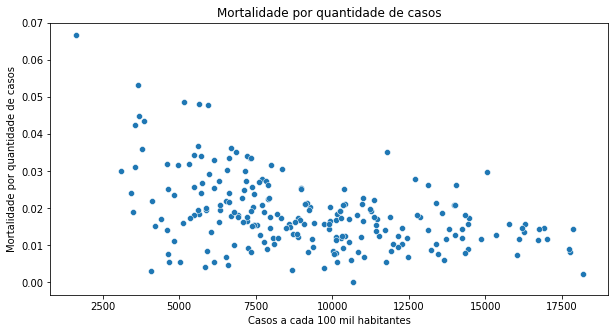

In [3]:
sct = sns.scatterplot(x = 'confirmed_per_100k_inhabitants', y = 'death_rate', data= casos_df)
sct.set_xlabel('Casos a cada 100 mil habitantes')
sct.set_ylabel('Mortalidade por quantidade de casos')
sct.set_title('Mortalidade por quantidade de casos')
sct.figure.set_size_inches(10, 5)

Agora, utilizamos o K-means para encontrar grupos entre os municípios. Escolhemos observar primeiro como essa divisão ocorreria com 5 clusters.

In [4]:
input_data = casos_df[['confirmed_per_100k_inhabitants', 'death_rate']]
input_data

,confirmed_per_100k_inhabitants,death_rate
0,10945.08054,0.0124
1,9378.33037,0.0095
2,14476.59904,0.0175
3,7222.40811,0.0165
4,14230.76923,0.0121
...,...,...
218,5498.94057,0.0257
219,4646.25132,0.0076
220,5361.13179,0.0174
221,4968.61925,0.0316


In [5]:
kmeans = KMeans(n_clusters= 5)

In [6]:
kmeans.fit(input_data)

KMeans(n_clusters=5)

In [7]:
kmeans.labels_

array([1, 1, 3, 4, 3, 3, 1, 3, 4, 3, 1, 4, 2, 4, 1, 2, 1, 1, 3, 4, 3, 4,
       1, 1, 4, 3, 4, 4, 3, 3, 4, 1, 2, 3, 4, 3, 3, 1, 4, 3, 1, 2, 4, 2,
       1, 0, 4, 1, 4, 1, 2, 4, 0, 3, 4, 0, 1, 2, 1, 1, 2, 1, 2, 4, 4, 1,
       2, 3, 1, 0, 1, 4, 3, 4, 0, 4, 0, 4, 1, 1, 0, 4, 4, 3, 4, 2, 0, 3,
       3, 3, 1, 4, 1, 3, 2, 3, 2, 1, 3, 4, 2, 3, 1, 0, 3, 1, 1, 4, 4, 1,
       2, 1, 1, 2, 1, 2, 2, 4, 4, 4, 2, 1, 3, 1, 2, 4, 1, 4, 3, 4, 4, 3,
       3, 2, 3, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 4, 1, 4, 4, 4, 0, 4, 1, 2,
       1, 2, 4, 2, 1, 4, 4, 1, 1, 2, 4, 4, 4, 1, 2, 0, 4, 4, 4, 2, 0, 1,
       0, 1, 4, 2, 1, 4, 2, 3, 4, 1, 1, 2, 2, 1, 0, 2, 1, 3, 4, 1, 4, 2,
       4, 4, 0, 4, 1, 1, 3, 4, 0, 4, 4, 1, 0, 2, 2, 4, 4, 2, 1, 2, 2, 2,
       2, 2, 4], dtype=int32)

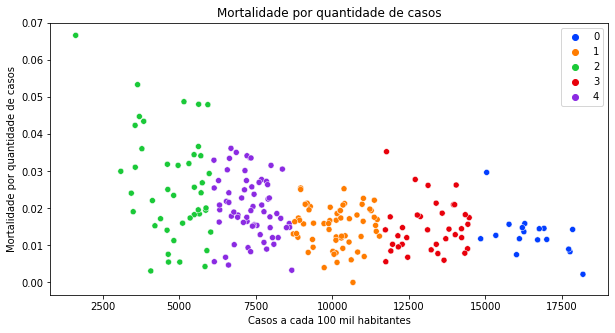

In [8]:
ax = sns.scatterplot(x = 'confirmed_per_100k_inhabitants', y = 'death_rate', data= input_data, hue= kmeans.labels_, palette= 'bright')
ax.set_xlabel('Casos a cada 100 mil habitantes')
ax.set_ylabel('Mortalidade por quantidade de casos')
ax.set_title('Mortalidade por quantidade de casos')
ax.figure.set_size_inches(10, 5)

Este é o gráfico que representa os clusters que encontramos. Podemos ver que os agrupamentos não são interessantes, separados praticamente verticalmente ao longo do eixo x. Isso ocorre pois as variáveis dos dois eixos têm escalas de grandeza distintas demais, a mortalidade varia de 0 a 0.07, enquanto os casos a cada 100 mil habitantes chegam a quase 18.000.

Portanto para encontrarmos agrupamentos mais pontuais, devemos antes normalizar ambas as variáveis e repetir o processo de clusterização.

In [9]:
med_conf_p100 = np.mean(casos_df['confirmed_per_100k_inhabitants'])
std_conf_p100 = np.std(casos_df['confirmed_per_100k_inhabitants'])

med_dth_rt = np.mean(casos_df['death_rate'])
std_dth_rt = np.std(casos_df['death_rate'])

In [10]:
conf_p100_norm = norm.cdf(casos_df['confirmed_per_100k_inhabitants'], loc = med_conf_p100 , scale= std_conf_p100)
dth_rt_norm = norm.cdf(casos_df['death_rate'],loc = med_dth_rt , scale= std_dth_rt)

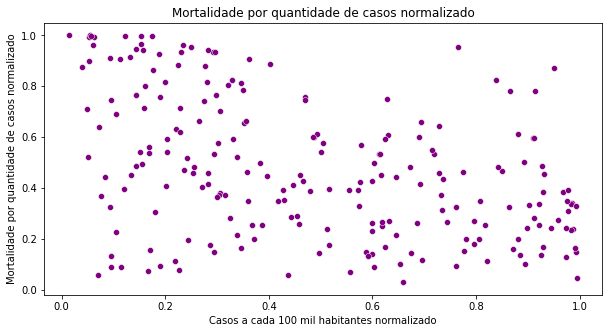

In [11]:
ax = sns.scatterplot(x = conf_p100_norm, y = dth_rt_norm, color = 'purple')
ax.set_xlabel('Casos a cada 100 mil habitantes normalizado')
ax.set_ylabel('Mortalidade por quantidade de casos normalizado')
ax.set_title('Mortalidade por quantidade de casos normalizado')
ax.figure.set_size_inches(10, 5)

Este é o novo gráfico scatter para as variáveis analizadas, desta vez com os eixos normalizados de 0 a 1.

In [12]:
thing_dict = {'Casos a cada 100 mil habitantes normalizado' : conf_p100_norm, 'Mortalidade por quantidade de casos normalizado': dth_rt_norm}

In [13]:
input_data = pd.DataFrame(thing_dict)
input_data

,Casos a cada 100 mil habitantes normalizado,Mortalidade por quantidade de casos normalizado
0,0.685875,0.264779
1,0.515425,0.178016
2,0.931677,0.455742
3,0.282856,0.415804
4,0.921977,0.254909
...,...,...
218,0.143561,0.764520
219,0.095619,0.132264
220,0.134874,0.451722
221,0.112134,0.906517


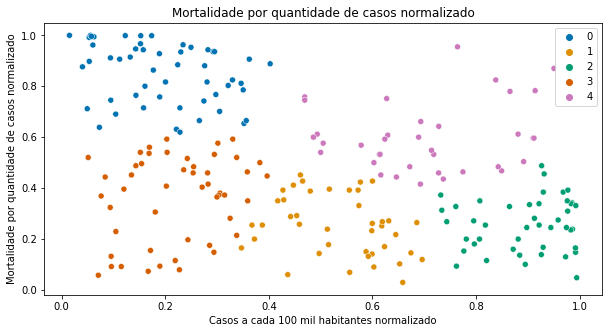

In [23]:
kmeans = KMeans(n_clusters= 5)
kmeans.fit(input_data)
ax = sns.scatterplot(x = conf_p100_norm, y = dth_rt_norm, hue= kmeans.labels_, palette= 'colorblind')
ax.set_xlabel('Casos a cada 100 mil habitantes normalizado')
ax.set_ylabel('Mortalidade por quantidade de casos normalizado')
ax.set_title('Mortalidade por quantidade de casos normalizado')
ax.figure.set_size_inches(10, 5)

Agora, os municípios se agrupam de forma mais interessante

O grupo 0, representado em azul no gráfico, representa municípios que possuem poucos casos de covid-19 em relação à população, porém a mortalidade pela covid é alta. Isso pode ocorrer devido à subnotificação de casos, possivelmente esses municípios tenderam a testar os casos mais graves da doença e nem tanto casos mais leves, de forma a inflacionar a mortalidade. Outra razão plausível pode ser uma possível deficiência de infraestrutura hospitalar para atender os casos mais graves.

O grupo 1, representado em amarelo/laranja no gráfico, representa municípios que possuem uma quantidade média de casos, e baixa mortalidade.
  
O grupo 2, representado em verde, são aqueles que possuem muitos casos por 100 mil habitantes, porém mesmo assim a mortalidade permanece baixa, comparada a outros municípios.
  
O grupo 3, representado em laranja/vermelho, são municípios cujos casos e mortalidade permaneceram baixos.
  
  E, por fim, o grupo 4, representado em rosa/roxo, são municípios de média a alta quantidade de casos, com maior mortalidade. Esses municípios possivelmente podem ter tido problemas de superlotação nas UTIs, devido ao maior fluxo de casos, e consequentemente pior atendimento aos casos graves."